In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
rh = pd.read_csv('D:/TNC-Demand-Model/Outputs/Monthly_Ridehail_Trips.csv')

In [ ]:
rh = rh.groupby(by = ['YEAR','MONTH','ORIGIN','DESTINATION'],as_index = False).mean()

In [ ]:
len(rh)

In [ ]:
acs = pd.read_csv('D:/TNC-Demand-Model/Outputs/Chicago_ACS_Data.csv')

In [ ]:
acs.columns

In [ ]:
rh[['TRAVEL_TIME_MINUTES_UNSUPPRESSED','DISTANCE_UNSUPPRESSED','FARE_UNSUPPRESSED']].mean()

In [ ]:
rh[['TRAVEL_TIME_MINUTES_SUPPRESSED','DISTANCE_SUPPRESSED','FARE_SUPPRESSED']].mean()

In [ ]:
rh = rh.fillna(0)

In [ ]:
rh['TRIPS_SHARED'] = rh['TRIPS_SHARED_UNSUPPRESSED'] + rh['TRIPS_SHARED_SUPPRESSED']
rh['TRIPS_PRIVATE'] = rh['TRIPS_PRIVATE_UNSUPPRESSED'] + rh['TRIPS_PRIVATE_SUPPRESSED']
rh['TRIPS_SUPPRESSED'] = rh['TRIPS_SHARED_SUPPRESSED'] + rh['TRIPS_PRIVATE_SUPPRESSED']
rh['TRIPS_UNSUPPRESSED'] = rh['TRIPS_SHARED_UNSUPPRESSED'] + rh['TRIPS_PRIVATE_UNSUPPRESSED']

rh['TRIPS_ALL'] = rh['TRIPS_PRIVATE'] + rh['TRIPS_SHARED']

In [13]:
rh = rh[['TRIPS_UNSUPPRESSED','TRIPS_SUPPRESSED','DISTANCE','TRAVEL_TIME_MINUTES','YEAR','MONTH','ORIGIN']].merge(acs,how = 'left', left_on = ['YEAR', 'MONTH', 'ORIGIN'], right_on = ['YEAR', 'MONTH', 'CENSUS_TRACT'], suffixes = ('','_ORIGIN'))

In [17]:
rh.columns

Index(['TRIPS_UNSUPPRESSED', 'TRIPS_SUPPRESSED', 'YEAR', 'MONTH', 'ORIGIN',
       'Unnamed: 0', 'TOD', 'CENSUS_TRACT', 'TOTAL_POP', 'TOTAL_MALE',
       'TOTAL_FEMALE', 'AGE_5U', 'AGE_5_9', 'AGE_10_14', 'AGE_15_19',
       'AGE_20_24', 'AGE_25_34', 'AGE_35_44', 'AGE_45_54', 'AGE_55_59',
       'AGE_60_64', 'AGE_65_74', 'AGE_75_84', 'AGE_85P', 'MEDIAN_AGE',
       'TOTAL_HHLDS', 'AVG_HHLD_SIZE', 'AVG_FAMILY_SIZE', 'TOTAL_POP_18_24',
       'TOTAL_POP_18_24_NO_HIGH_SCHOOL', 'TOTAL_POP_18_24_HIGH_SCHOOL',
       'TOTAL_POP_18_24_SOME_COLLEGE', 'TOTAL_POP_18_24_SOME_BACHELORS_HIGHER',
       'TOTAL_POP_25P', 'TOTAL_POP_25P_LESS_THAN_9TH',
       'TOTAL_POP_25P_9TH_TO_12TH', 'TOTAL_POP_25P_HIGH_SCHOOL',
       'TOTAL_POP_25P_SOME_COLLEGE', 'TOTAL_POP_25P_ASSOCIATES',
       'TOTAL_POP_25P_BACHELORS', 'TOTAL_POP_25P_GRADUATE',
       'TOTAL_POP_25P_HIGH_SCHOOL_HIGHER', 'TOTAL_POP_25P_BACHELORS_HIGHER',
       'TOTAL_HHLDS_LESS_10K', 'TOTAL_HHLDS_10K_15K', 'TOTAL_HHLDS_15K_25K',
       'TOTA

In [18]:
# Compute the correlation matrix
non_sup_corr = rh[['TRIPS_UNSUPPRESSED','AVG_HHLD_SIZE','MEDIAN_AGE','AVG_VEH_PER_HHLD','HHLDS_MEAN_INCOME']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(non_sup_corr, dtype=bool))

<AxesSubplot:>

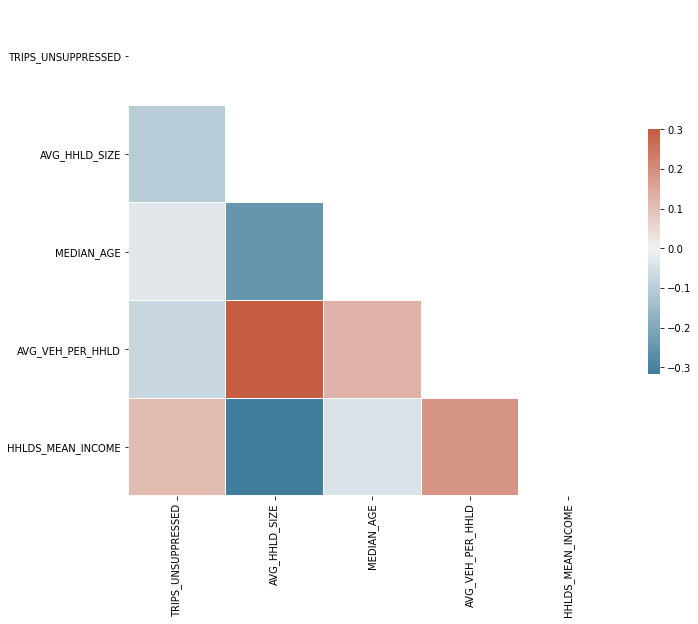

In [19]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(non_sup_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [20]:
# Compute the correlation matrix
non_sup_corr = rh[['TRIPS_SUPPRESSED','AVG_HHLD_SIZE','MEDIAN_AGE','AVG_VEH_PER_HHLD','HHLDS_MEAN_INCOME']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(non_sup_corr, dtype=bool))

<AxesSubplot:>

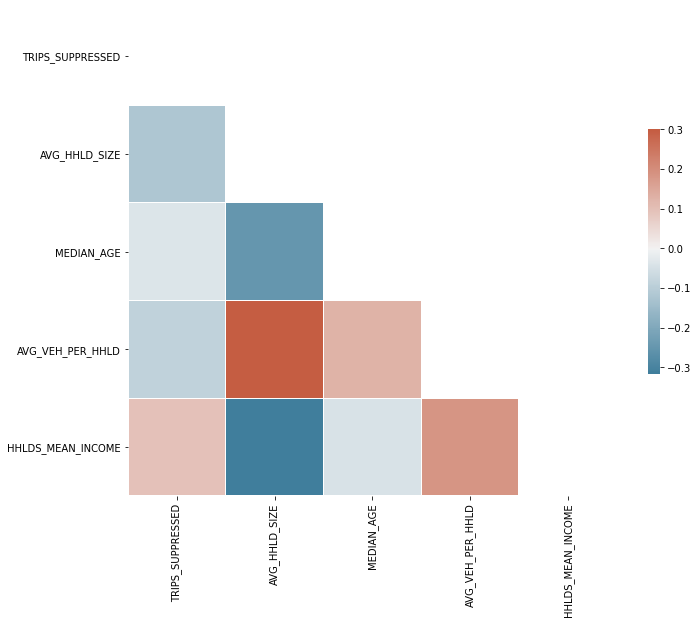

In [21]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(non_sup_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
rh['TRIPS_SUPPRESSED_SHARE'] = rh['TRIPS_SUPPRESSED']/(rh['TRIPS_UNSUPPRESSED']+rh['TRIPS_SUPPRESSED'])

In [26]:
# Compute the correlation matrix
non_sup_corr = rh[['TRIPS_SUPPRESSED_SHARE','AVG_HHLD_SIZE','MEDIAN_AGE','AVG_VEH_PER_HHLD','HHLDS_MEAN_INCOME']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(non_sup_corr, dtype=bool))

<AxesSubplot:>

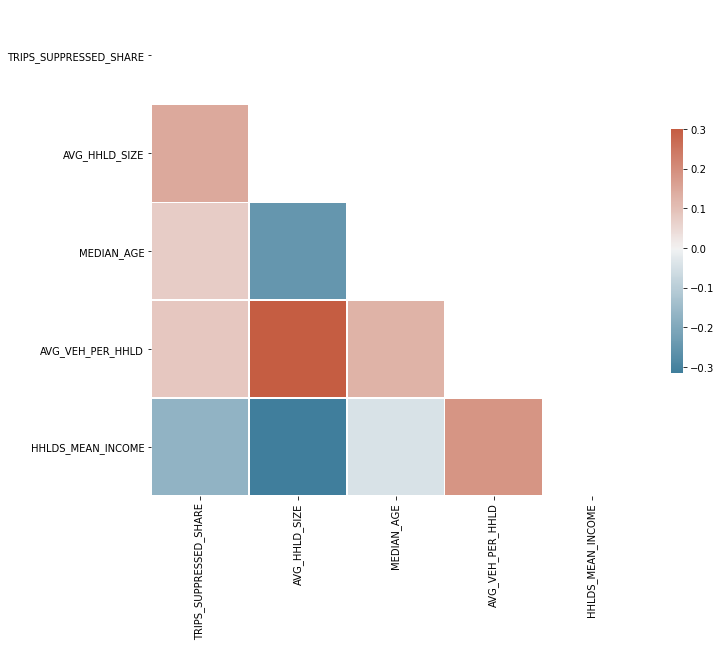

In [27]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(non_sup_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})